In [50]:
!ls

1-La_Repubblica_scraper.ipynb    no.csv
2_Words_analysis.ipynb           only_words.csv
Analysis 2.ipynb                 other.csv
awefawf.csv                      output
b_names.svg                      person.csv
b_verbs.svg                      personal.csv
berlusconi.html                  pivot.csv
berlusconi2.html                 politics.csv
business.csv                     result_df.csv
common_words.csv                 result_df_edit.csv
data                             result_grouped.csv
df_melted.csv                    results_test.csv
headlines.csv                    script.js
legal.csv                        sentiment.csv
location.csv                     styles.css
locatoin.csv                     unique_words.csv
names.svg                        unique_words_with_categories.csv
names_b.svg                      verb.csv


In [51]:
import pandas as pd
import csv

In [52]:
df = pd.read_csv('headlines.csv')
df

,Title,Date,URL
0,Berlusconi espande l' attività finanziaria,2/1/84,https://quotidiano.repubblica.it/edicola/searc...
1,"Rizzoli, scende in pista Berlusconi?",4/11/84,https://quotidiano.repubblica.it/edicola/searc...
2,DIVORZIO BERLUSCONI-SIPRA UN AFFARE DA 20 MILI...,7/26/84,https://quotidiano.repubblica.it/edicola/searc...
3,LA ' NDRANGHETA VOLEVA RAPIRE BERLUSCONI,8/12/84,https://quotidiano.repubblica.it/edicola/searc...
4,LA FININVEST DI BERLUSCONI AUMENTA IL CAPITALE,8/15/84,https://quotidiano.repubblica.it/edicola/searc...
...,...,...,...
31800,"FI, poche certezze senza Berlusconi E il gove...",6/30/23,https://quotidiano.repubblica.it/edicola/searc...
31801,Garantiamo la libertà di vilipendio Un De And...,6/30/23,https://quotidiano.repubblica.it/edicola/searc...
31802,La tv tedesca Prosieben cede ai Berlusconi: pe...,6/30/23,https://www.repubblica.it/economia/2023/06/30/...
31803,Berlusconi,7/1/23,https://quotidiano.repubblica.it/edicola/searc...


In [53]:
df.head()

,Title,Date,URL
0,Berlusconi espande l' attività finanziaria,2/1/84,https://quotidiano.repubblica.it/edicola/searc...
1,"Rizzoli, scende in pista Berlusconi?",4/11/84,https://quotidiano.repubblica.it/edicola/searc...
2,DIVORZIO BERLUSCONI-SIPRA UN AFFARE DA 20 MILI...,7/26/84,https://quotidiano.repubblica.it/edicola/searc...
3,LA ' NDRANGHETA VOLEVA RAPIRE BERLUSCONI,8/12/84,https://quotidiano.repubblica.it/edicola/searc...
4,LA FININVEST DI BERLUSCONI AUMENTA IL CAPITALE,8/15/84,https://quotidiano.repubblica.it/edicola/searc...


In [54]:
df.dtypes

Title    object
Date     object
URL      object
dtype: object

In [55]:
# Adding Year column
df['Date']= pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df.head()

/var/folders/m0/g7ky_r7x67l1pv2zgg_fptx80000gn/T/ipykernel_15972/3093956618.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']= pd.to_datetime(df['Date'])


,Title,Date,URL,Year
0,Berlusconi espande l' attività finanziaria,1984-02-01,https://quotidiano.repubblica.it/edicola/searc...,1984
1,"Rizzoli, scende in pista Berlusconi?",1984-04-11,https://quotidiano.repubblica.it/edicola/searc...,1984
2,DIVORZIO BERLUSCONI-SIPRA UN AFFARE DA 20 MILI...,1984-07-26,https://quotidiano.repubblica.it/edicola/searc...,1984
3,LA ' NDRANGHETA VOLEVA RAPIRE BERLUSCONI,1984-08-12,https://quotidiano.repubblica.it/edicola/searc...,1984
4,LA FININVEST DI BERLUSCONI AUMENTA IL CAPITALE,1984-08-15,https://quotidiano.repubblica.it/edicola/searc...,1984


# Now we are ready for the language analysis 

In [56]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [57]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mdallastella/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mdallastella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
# Get the default stopwords from NLTK
stop_words = set(stopwords.words('italian'))

In [59]:
# Manually add additional stopwords
additional_stopwords = ["berlusconi", "silvio", "ci","cosi", "intervista", "forza", "casa", "anti", "co", "cir"
                        "sì", "può", "mai", "no", "ora", "s√¨", "fa", "due", "deve", "niente", "de", "ex",
                        "va", "così", "via", "dopo", "italia", "unomini", "legati", "va", "fra", "adesso",
                        "me", "d", "senza", "ecco", "ancora", "vuole", "anni", "va", "manca", "tante", "piu", "oggi",
                       "poi", "dà", "quel", "essere", "detto", "cosa", "qui", "ok", "far", "co", "cosi", "manca", "de",
                       "jr", "grandi", "ore", "sa", "piu", "san", "anti", "verso", "va", "tre", "tante", "stato", "puo"] 
stop_words.update(additional_stopwords)

In [60]:
df['Tokenized Title'] = df['Title'].apply(lambda x: [word.lower() for word in word_tokenize(x, language='italian') if word.isalpha() and word.lower() not in stop_words])

In [61]:
df.head()

,Title,Date,URL,Year,Tokenized Title
0,Berlusconi espande l' attività finanziaria,1984-02-01,https://quotidiano.repubblica.it/edicola/searc...,1984,"[espande, attività, finanziaria]"
1,"Rizzoli, scende in pista Berlusconi?",1984-04-11,https://quotidiano.repubblica.it/edicola/searc...,1984,"[rizzoli, scende, pista]"
2,DIVORZIO BERLUSCONI-SIPRA UN AFFARE DA 20 MILI...,1984-07-26,https://quotidiano.repubblica.it/edicola/searc...,1984,"[divorzio, affare, miliardi]"
3,LA ' NDRANGHETA VOLEVA RAPIRE BERLUSCONI,1984-08-12,https://quotidiano.repubblica.it/edicola/searc...,1984,"[ndrangheta, voleva, rapire]"
4,LA FININVEST DI BERLUSCONI AUMENTA IL CAPITALE,1984-08-15,https://quotidiano.repubblica.it/edicola/searc...,1984,"[fininvest, aumenta, capitale]"


## Selecting words for the analysis

In [62]:
# df['year_month'] = df['Year'].astype(str) + df['Month'].astype(str)
df

,Title,Date,URL,Year,Tokenized Title
0,Berlusconi espande l' attività finanziaria,1984-02-01,https://quotidiano.repubblica.it/edicola/searc...,1984,"[espande, attività, finanziaria]"
1,"Rizzoli, scende in pista Berlusconi?",1984-04-11,https://quotidiano.repubblica.it/edicola/searc...,1984,"[rizzoli, scende, pista]"
2,DIVORZIO BERLUSCONI-SIPRA UN AFFARE DA 20 MILI...,1984-07-26,https://quotidiano.repubblica.it/edicola/searc...,1984,"[divorzio, affare, miliardi]"
3,LA ' NDRANGHETA VOLEVA RAPIRE BERLUSCONI,1984-08-12,https://quotidiano.repubblica.it/edicola/searc...,1984,"[ndrangheta, voleva, rapire]"
4,LA FININVEST DI BERLUSCONI AUMENTA IL CAPITALE,1984-08-15,https://quotidiano.repubblica.it/edicola/searc...,1984,"[fininvest, aumenta, capitale]"
...,...,...,...,...,...
31800,"FI, poche certezze senza Berlusconi E il gove...",2023-06-30,https://quotidiano.repubblica.it/edicola/searc...,2023,"[fi, poche, certezze, governo, potrebbe, indeb..."
31801,Garantiamo la libertà di vilipendio Un De And...,2023-06-30,https://quotidiano.repubblica.it/edicola/searc...,2023,"[garantiamo, libertà, vilipendio, andré, dedic..."
31802,La tv tedesca Prosieben cede ai Berlusconi: pe...,2023-06-30,https://www.repubblica.it/economia/2023/06/30/...,2023,"[tv, tedesca, prosieben, cede, prima, volta, c..."
31803,Berlusconi,2023-07-01,https://quotidiano.repubblica.it/edicola/searc...,2023,[]


In [63]:
# Group the Dataframe by Year

grouped_df = df.groupby(["Year"])["Tokenized Title"].sum()
grouped_df

Year
1984    [espande, attività, finanziaria, rizzoli, scen...
1985    [piace, legge, tv, critica, tv, raccogliere, p...
1986    [agnelli, frena, milan, supervalutato, sara, d...
1987    [tanzi, gioco, carte, mercato, tv, clan, criti...
1988    [pippo, scambio, doni, pace, agnes, entra, gar...
1989    [stranieri, confermati, perso, fiducia, giuro,...
1990    [spagna, rompera, partner, craxi, febbre, alta...
1991    [accuse, arbitro, cerca, alibi, smentisce, gio...
1992    [battezzare, salva, cinq, opzione, esalta, fra...
1993    [milan, invidiato, voglio, gs, guai, chiede, f...
1994    [documento, eccezionale, berlusconista, dirett...
1995    [scalfaro, verita, bettazzi, realizza, piano, ...
1996    [promette, senatur, rilancia, slitta, processo...
1997    [parla, affari, pensa, bicamerale, detta, cond...
1998    [previti, ingenti, somme, squillante, attacco,...
1999    [eredità, governo, saccà, raiuno, mastella, ba...
2000    [bossi, conferma, patto, tratto, spot, biscard...
2001    [

In [64]:
# Function to get most common words from tokenized titles. Change n value to change number of words per every year


n = 30

def get_most_common_words(tokenized_titles):
    all_words = [word.lower() for title in tokenized_titles for word in word_tokenize(title)]
    word_freq = FreqDist(all_words)
    return word_freq.most_common(n)


In [65]:
# Create an empty list to store rows
rows = []


In [66]:
# Iterate over groups and calculate most common words
for Year, titles in grouped_df.items():
    most_common_words = get_most_common_words(titles)
    for word, freq in most_common_words:
#         rows.append({"Year": year, "FourMonthGroup": four_month_group, "Word": word, "Frequency": freq})
        rows.append({"Year": Year, "Word": word, "Frequency": freq})



In [67]:
# Create the result DataFrame
result_df = pd.DataFrame(rows)

In [82]:
result_df.to_csv('result_df.csv')
result_df.sample(10)

,Year,Word,Frequency,Category
1064,2019,nuovo,9,other
672,2006,sfida,16,sentiment
740,2008,napolitano,22,politics
1025,2018,renzi,49,person
295,1993,replica,2,verb
137,1988,calcio,2,business
947,2015,sì,22,other
475,1999,ppi,4,politics
88,1986,frena,1,person
490,2000,governo,9,politics


For my analysis and stream graph I will need entries for those words with value `0` in certain years. We can do that with a pivot table.

In [69]:
df_pivot = result_df.pivot_table(index='Word', columns='Year', values='Frequency', fill_value=0).reset_index()
df_filled = pd.melt(df_pivot, id_vars='Word', var_name='Year', value_name='Frequency')
df_filled = df_filled.sort_values(by=['Year', 'Word']).reset_index(drop=True)

df_filled

,Word,Year,Frequency
0,accordo,1984,0
1,accusa,1984,0
2,accuse,1984,0
3,addio,1984,0
4,affare,1984,1
...,...,...,...
17915,vuol,2023,0
17916,walter,2023,0
17917,zangrillo,2023,0
17918,zeffirelli,2023,0


In [70]:
# Save unique words to a .csv file for local categorization

unique_words = result_df['Word'].unique()
unique_words_df = pd.DataFrame({'Word': unique_words})
unique_words_df.to_csv('unique_words.csv', index=False)

## Assign Categories

I have created locally a new file called `unique_words_with_categories.csv` in which I attributed to each word a category. For example, `verb` or `politics`.

In [71]:
categories = pd.read_csv('unique_words_with_categories.csv')
categories.head()

,Word,Category
0,rai,business
1,guerra,person
2,pubblicita,business
3,impero,business
4,espande,verb


In [72]:
# Adding the category to our main df

result_df = result_df.merge(categories, on='Word', how='left')
result_df.head()

,Year,Word,Frequency,Category
0,1984,rai,4,business
1,1984,guerra,2,person
2,1984,pubblicita,2,business
3,1984,impero,2,business
4,1984,espande,1,verb


In [73]:
# Create a new .csv that I will use for the D3 visualization

result_grouped = result_df.groupby(by=["Word", "Category"])["Frequency"].sum()

# Let's try visualize this thing

In [74]:
import matplotlib.pyplot as plt
import numpy as np

In [75]:
# group the data by 'Category', 'Year' and 'Word'
grouped_df = result_df.groupby(['Category', 'Year', 'Word']).sum().reset_index()


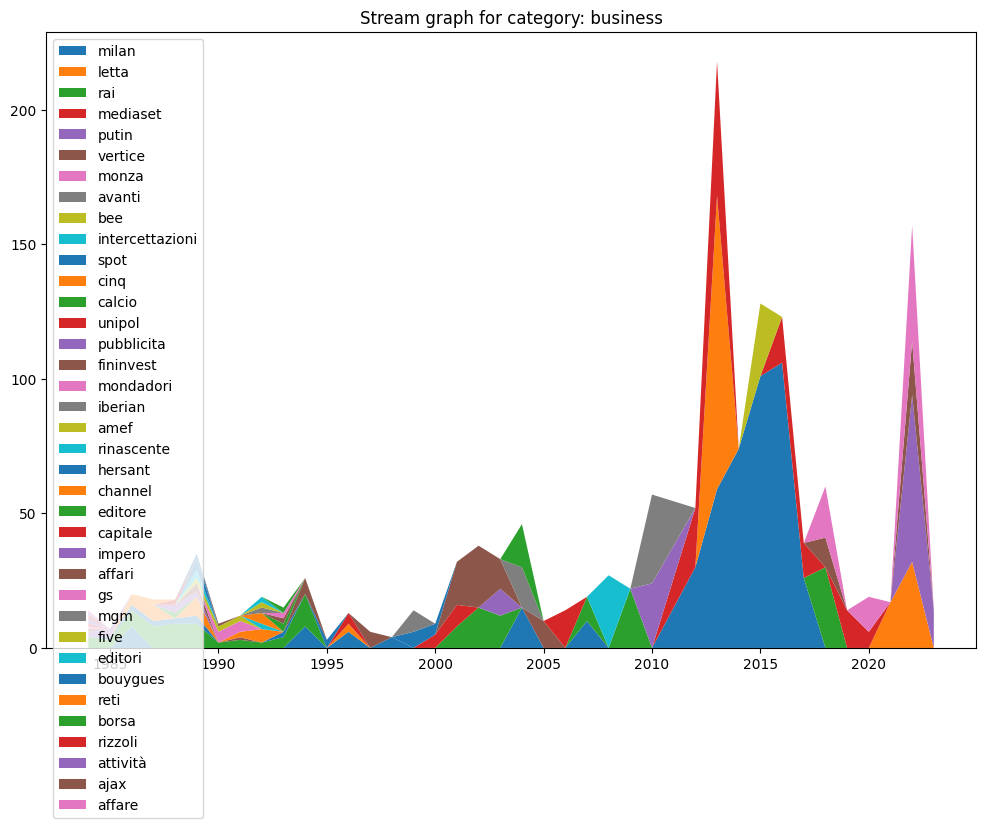

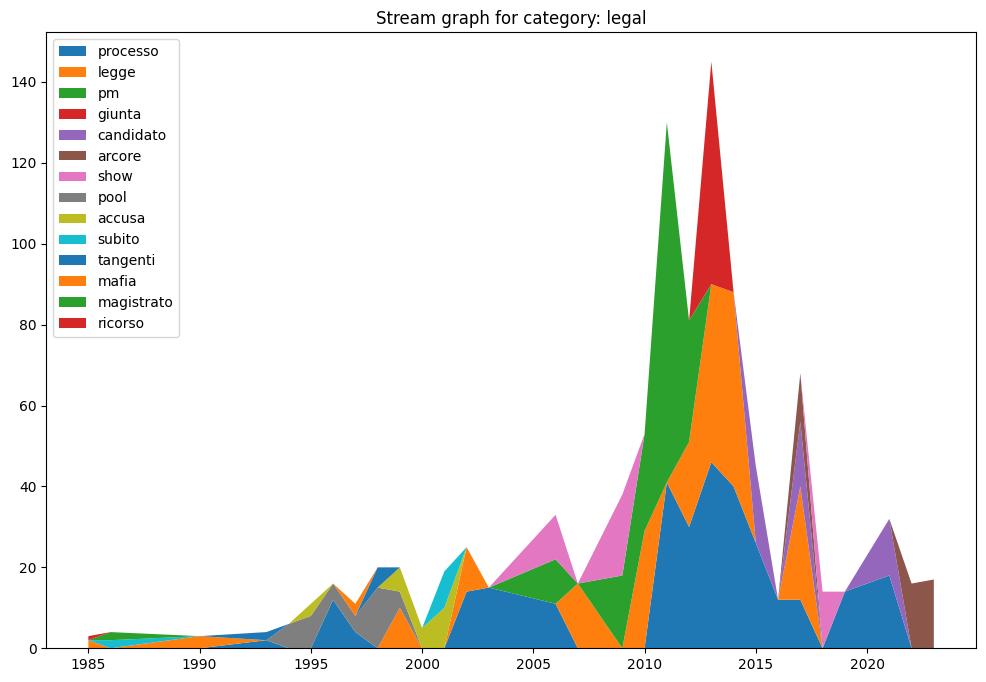

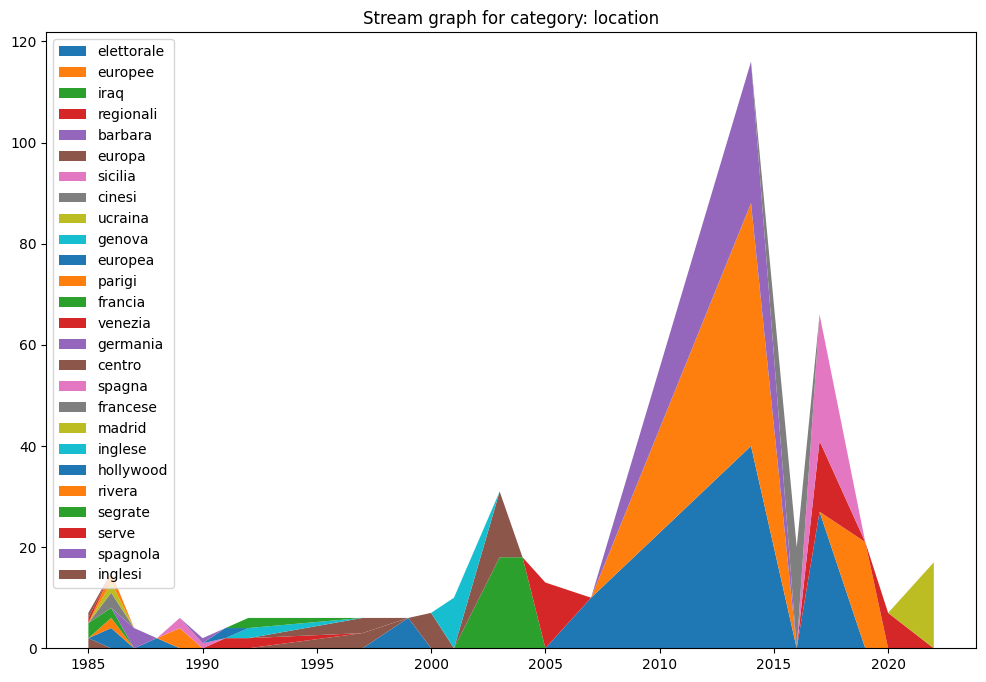

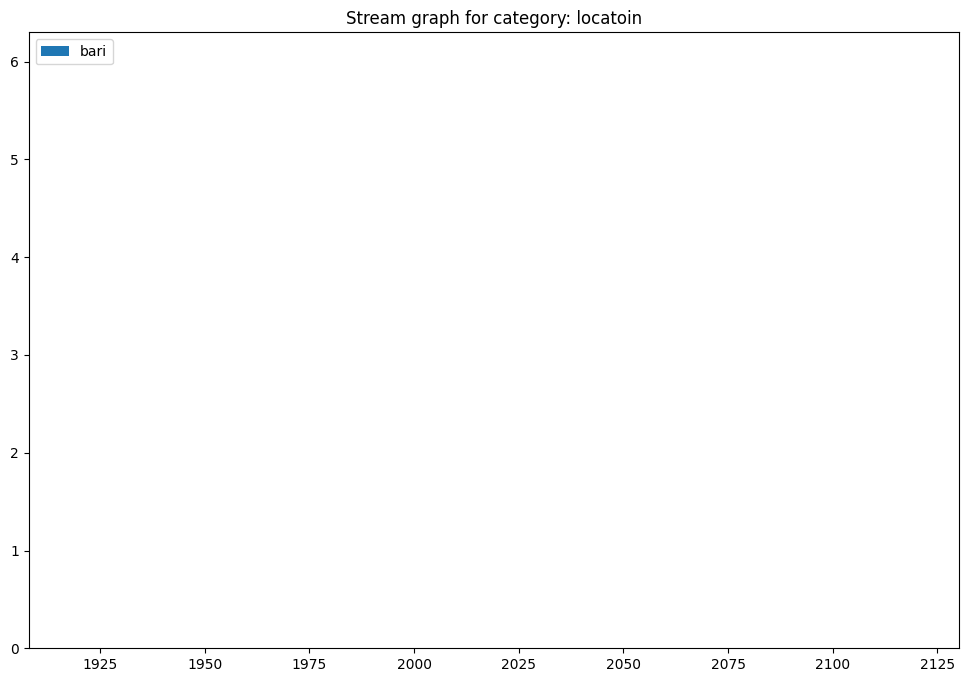

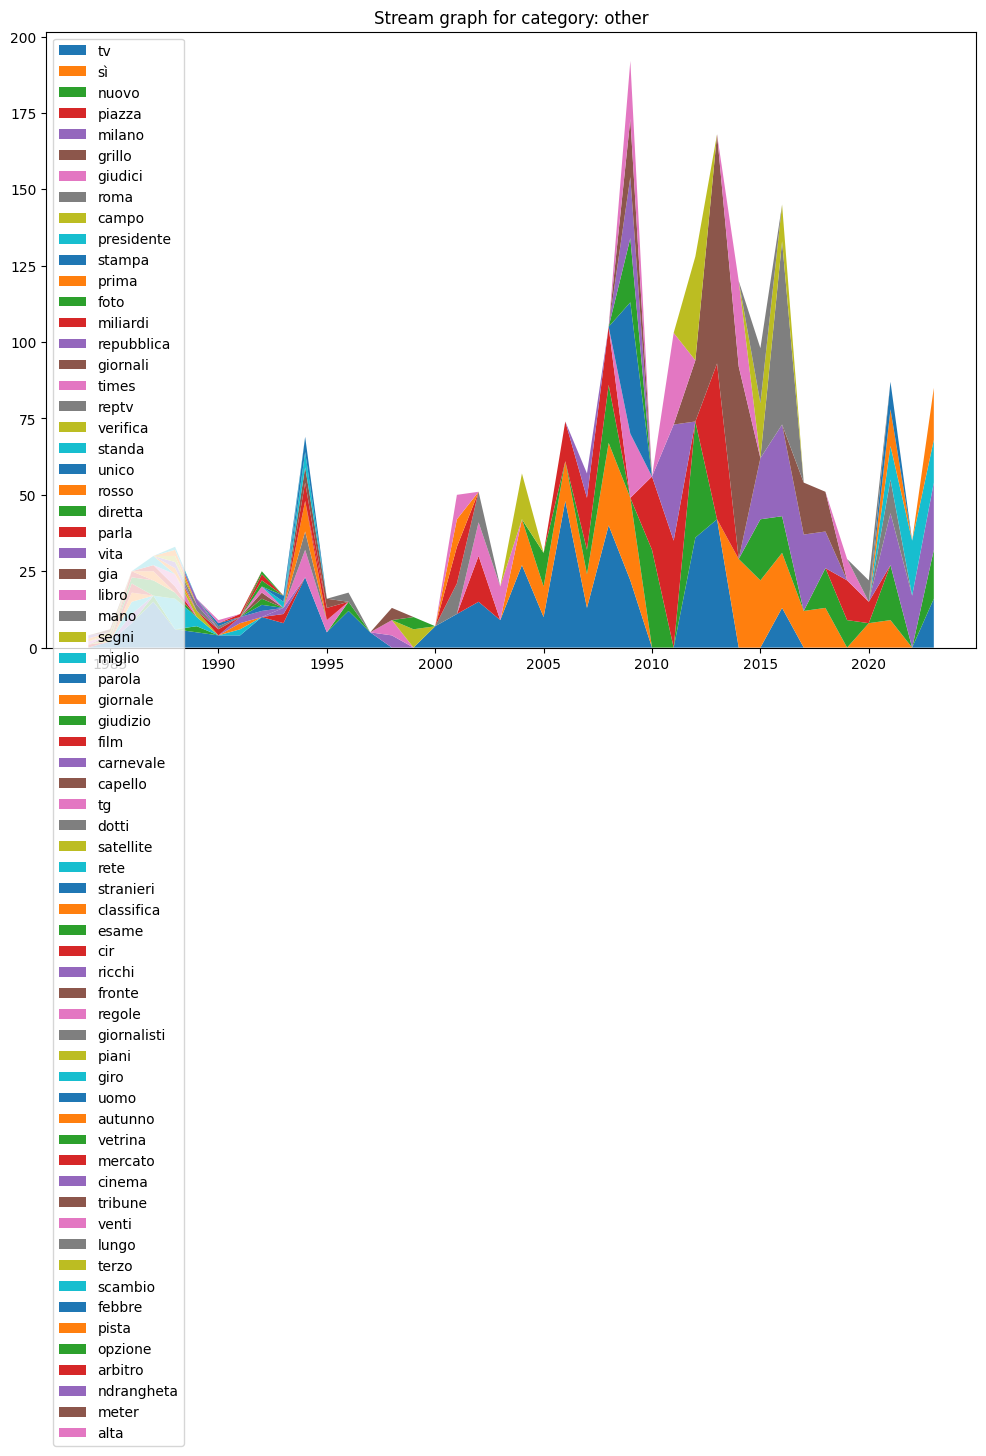

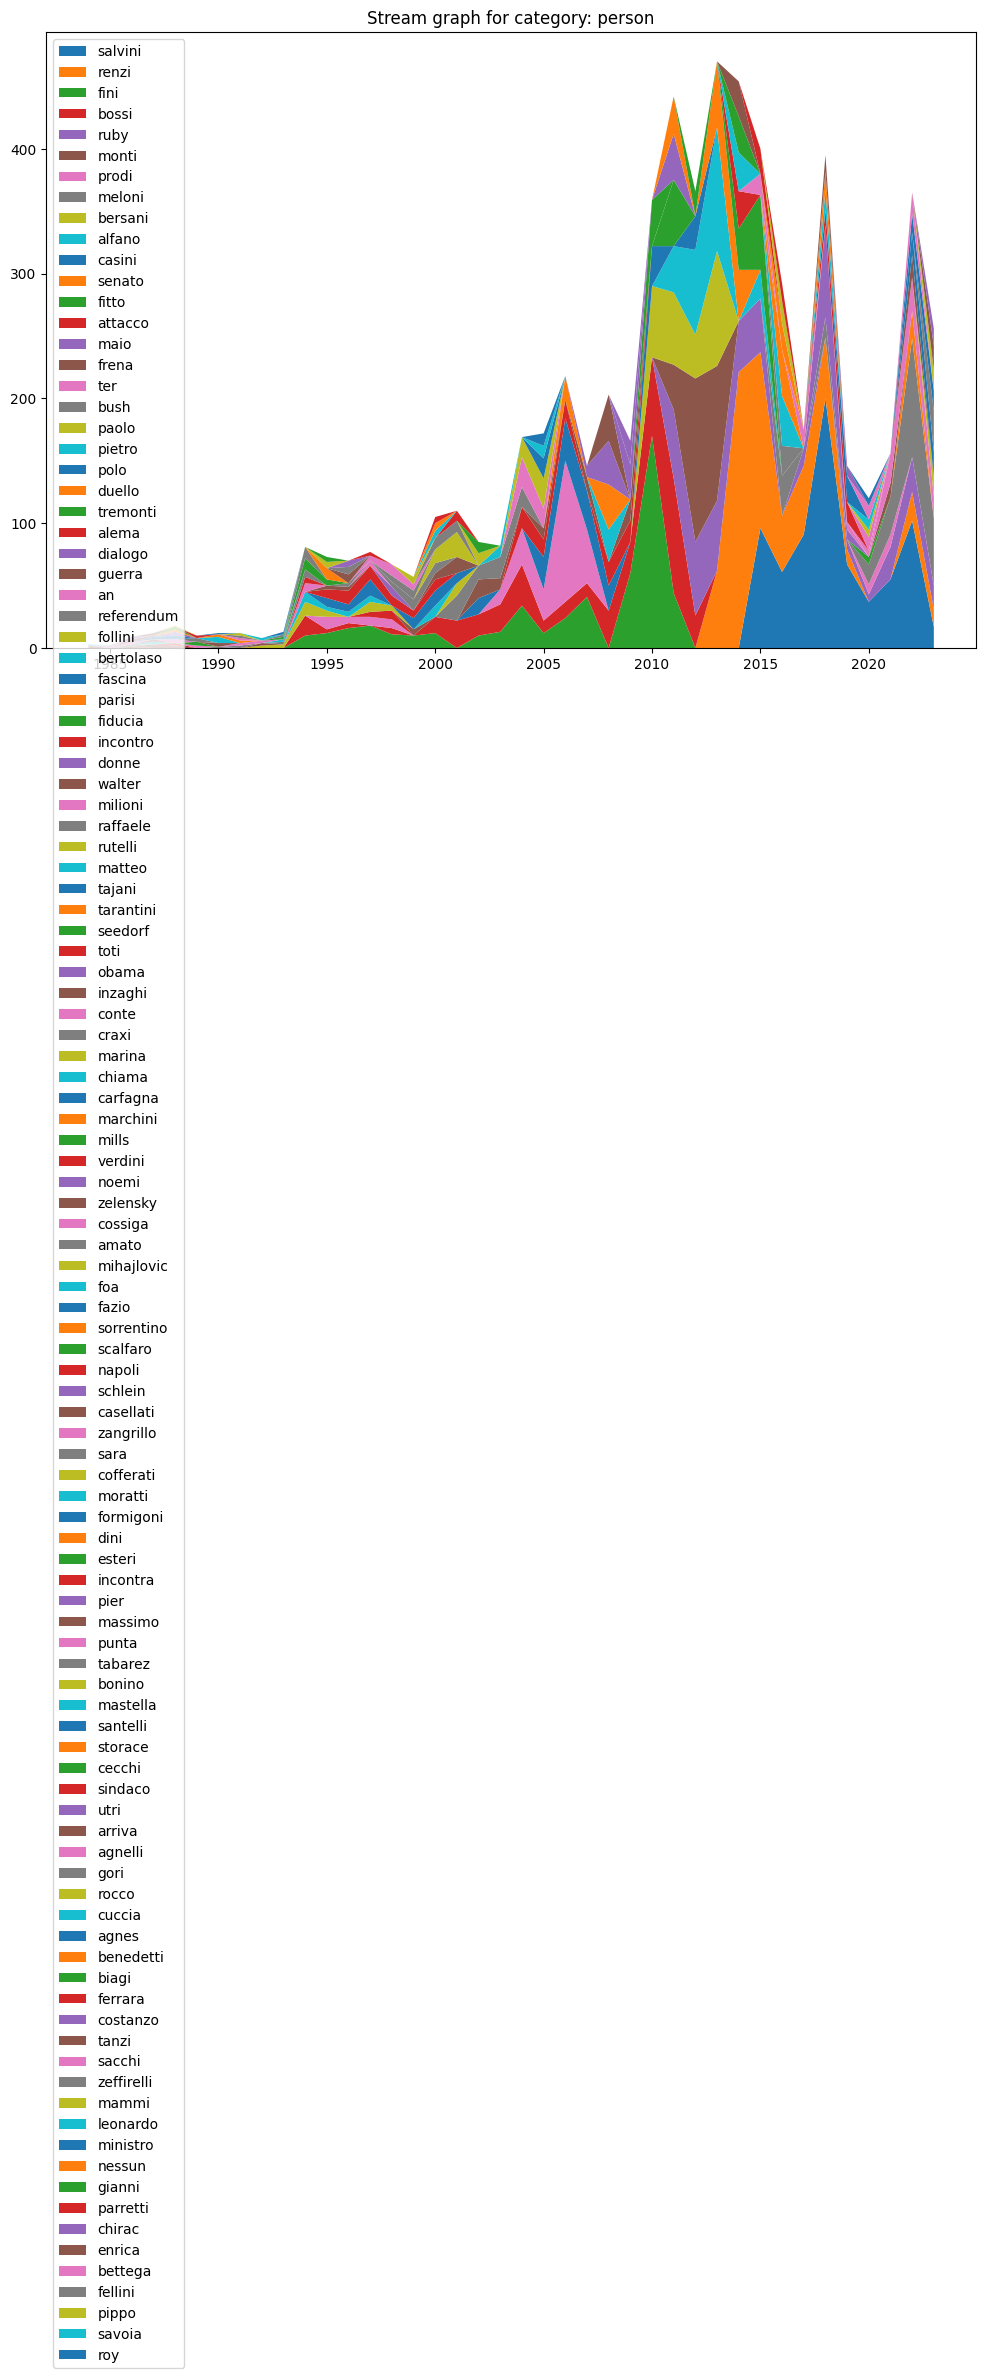

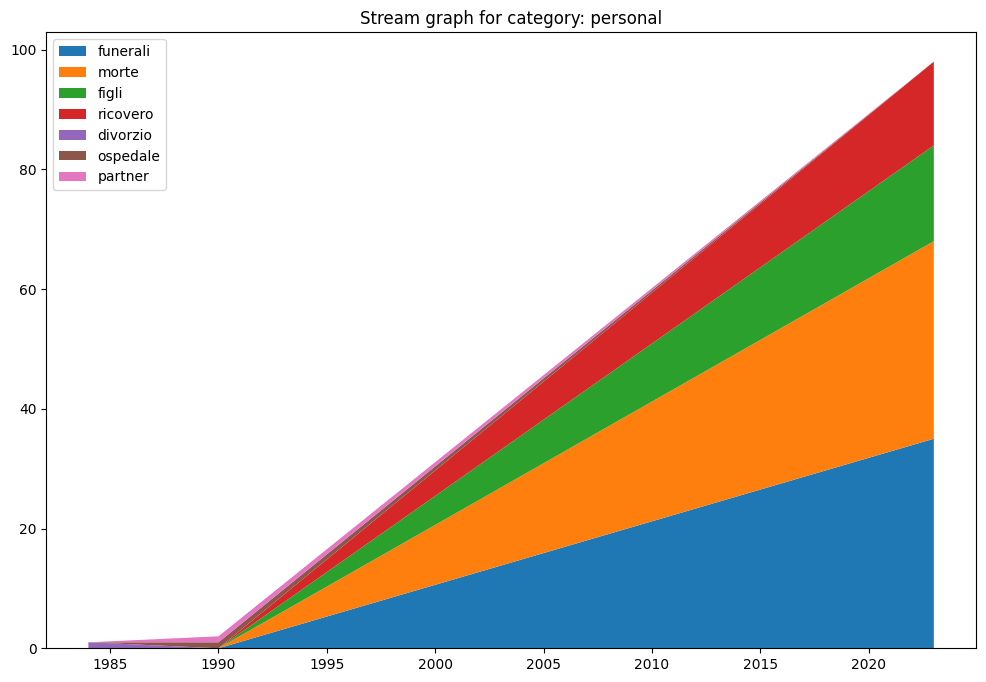

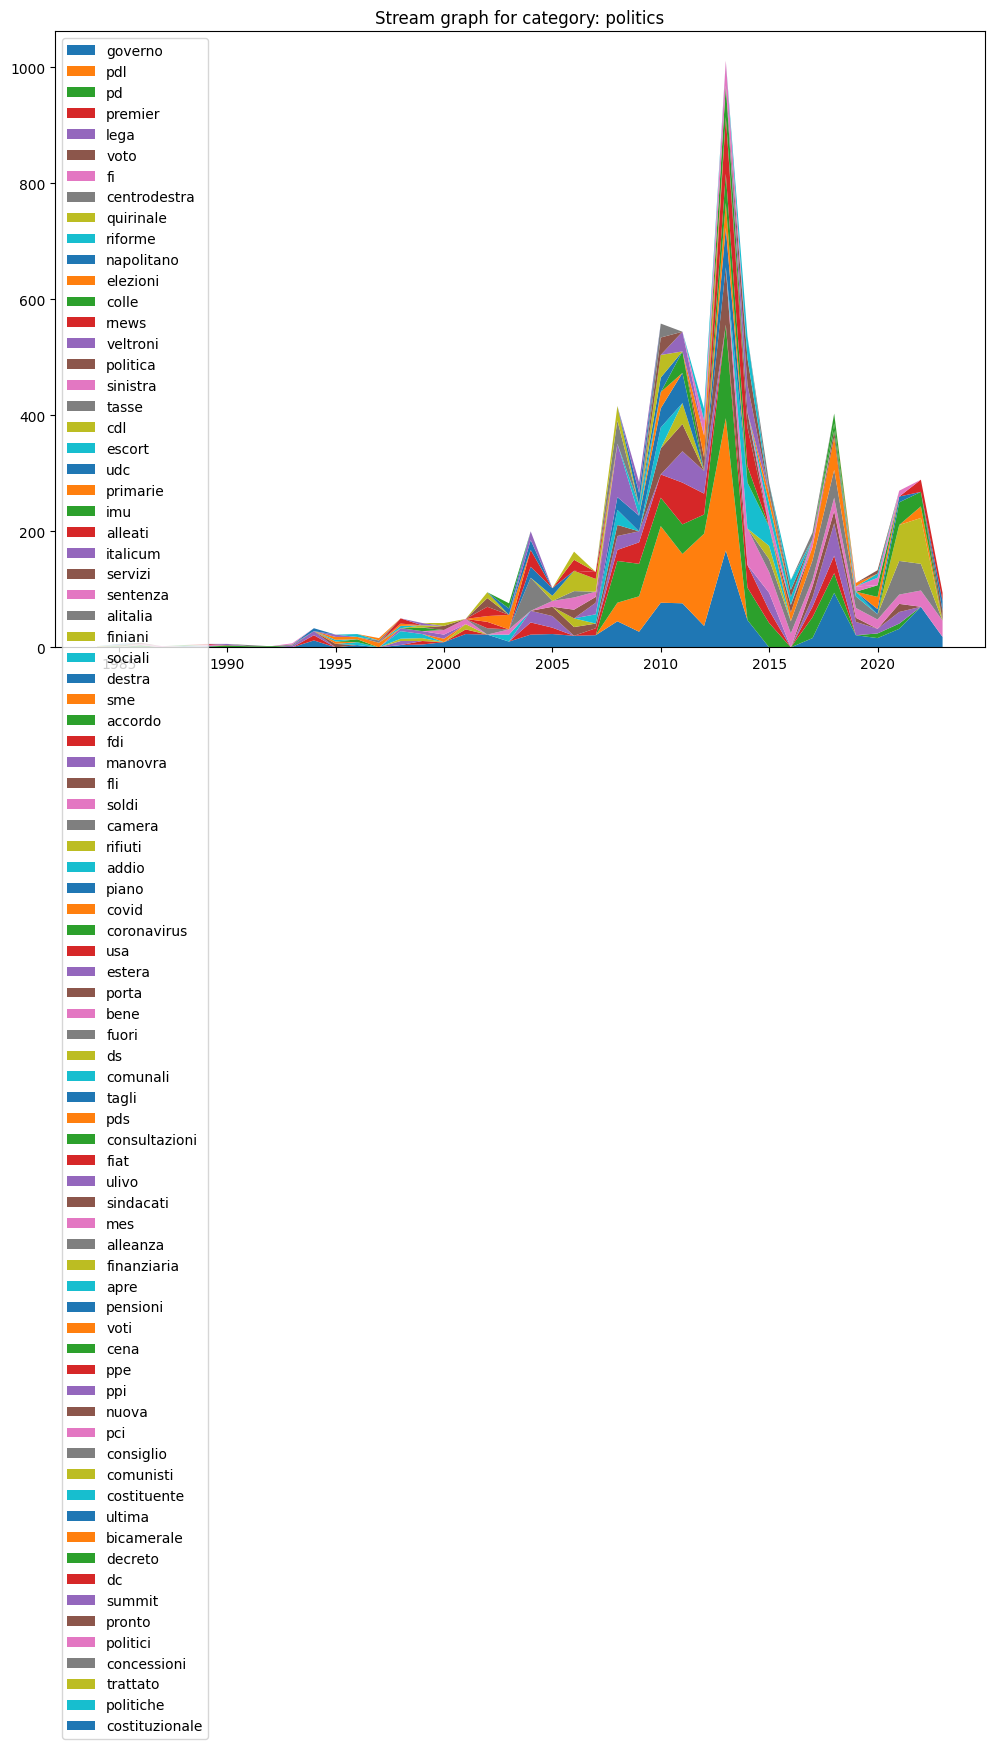

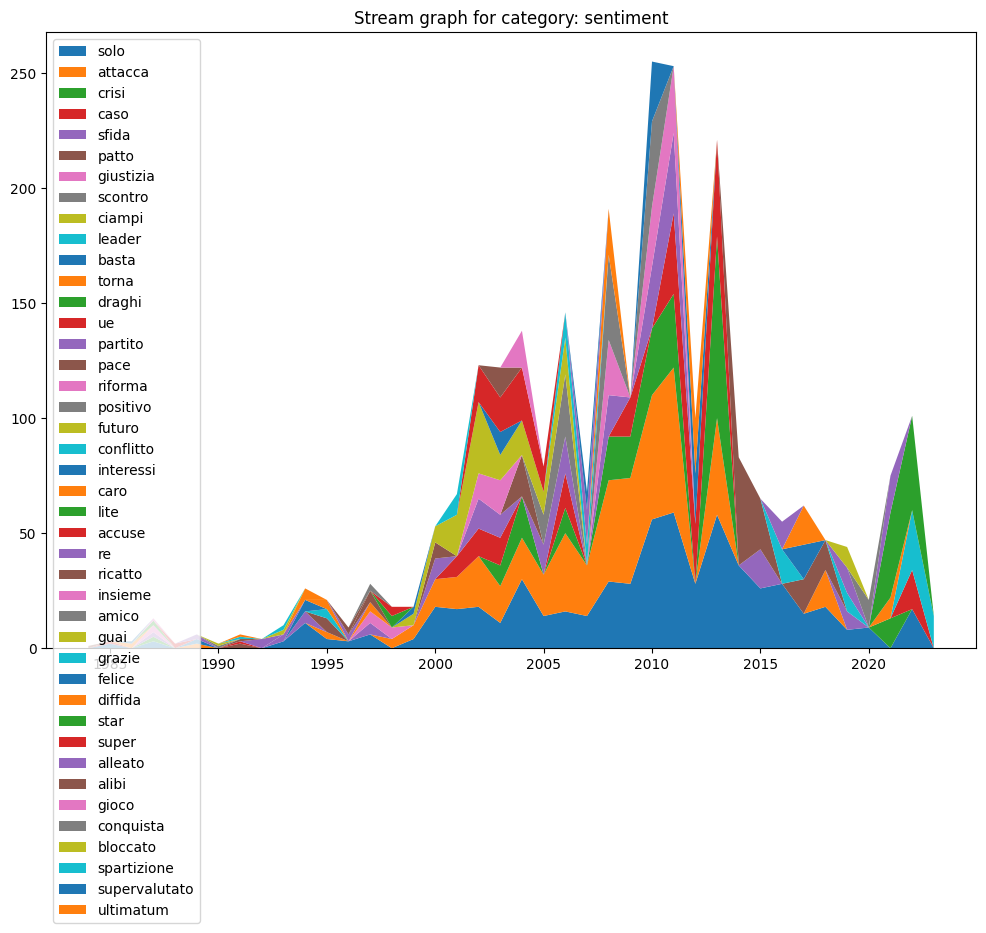

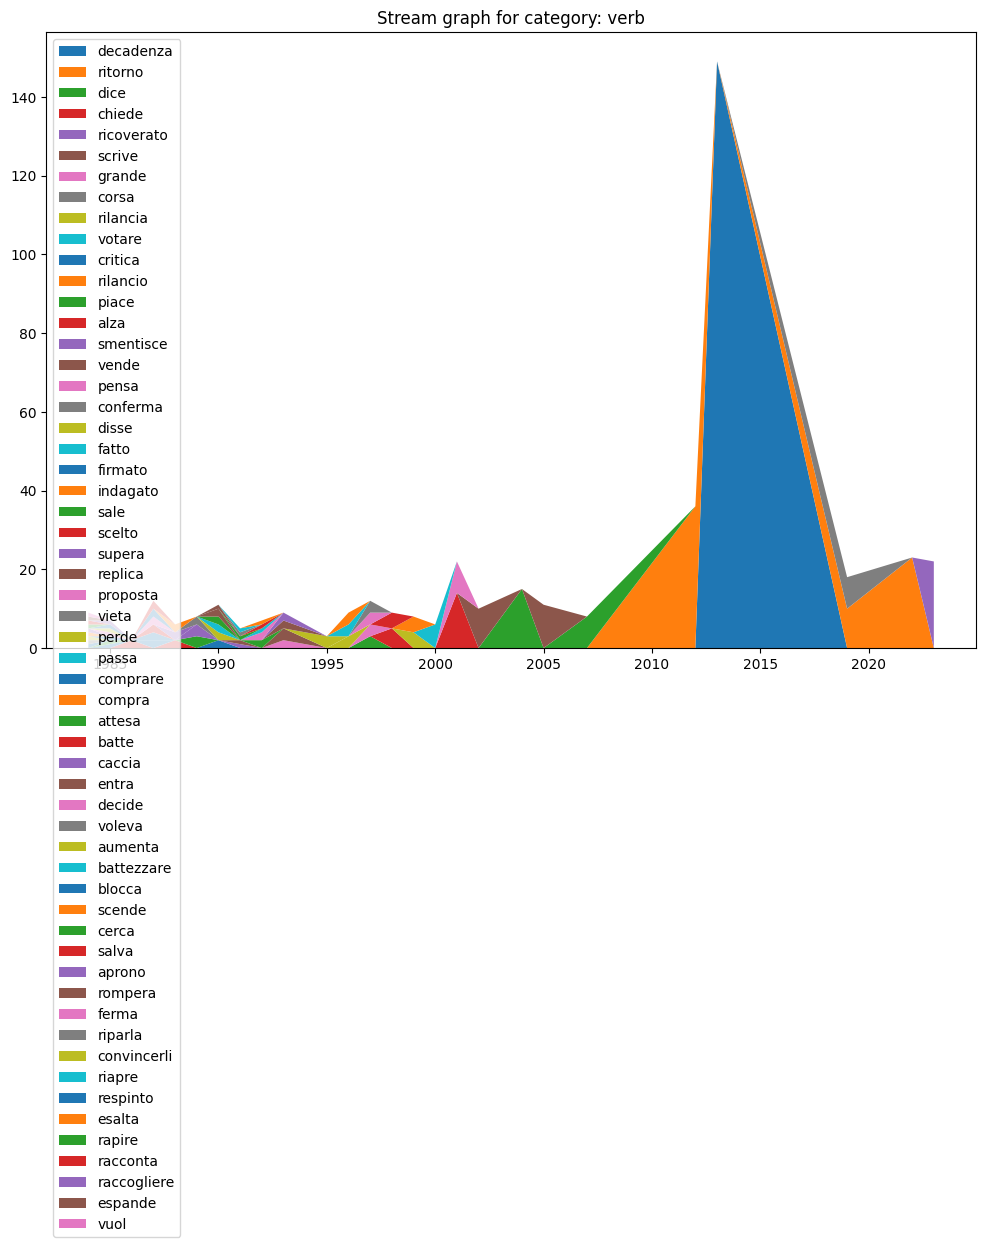

In [76]:
# Get the list of categories
categories = grouped_df['Category'].unique()

for category in categories:
    category_df = grouped_df[grouped_df['Category'] == category]
    
    # Pivot the dataframe to have years as columns, words as index and frequency as values
    pivot_df = category_df.pivot(index='Word', columns='Year', values='Frequency').fillna(0)

    # Sort by the total frequency over the years
    pivot_df = pivot_df.reindex(pivot_df.sum(axis=1).sort_values(ascending=False).index)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12,8))
    ax.stackplot(pivot_df.columns, pivot_df.values, labels=pivot_df.index, baseline='zero')
    plt.title(f'Stream graph for category: {category}')
    plt.legend(loc='upper left')
    plt.show()

In [81]:
# group by 'Category' and create a dictionary of dataframes
grouped = dict(tuple(result_df.groupby('Category')))

# loop through the dictionary and save each dataframe to a separate csv
for category, data in grouped.items():
    data.to_csv(f"output/{category}.csv", index=False)